In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading and Extracting the data

data = open('sample_airbnb.json', 'r')
airbnb_data = json.load(data)

In [4]:
airbnb_data[0]

{'_id': '1003530',
 'listing_url': 'https://www.airbnb.com/rooms/1003530',
 'name': 'New York City - Upper West Side Apt',
 'summary': '',
 'space': 'Murphy bed, optional second bedroom available. Wifi available, Hulu, Netflix, TV Eat-in kitchen. Bathroom with great shower/bath.  Washer/dryer in basement.',
 'description': "Murphy bed, optional second bedroom available. Wifi available, Hulu, Netflix, TV Eat-in kitchen. Bathroom with great shower/bath.  Washer/dryer in basement. New York City! Great neighborhood - many terrific restaurants, bakeries, bagelries. Within easy walking distance are restaurants with the cuisines from India, Thailand, Japan, China, Mexico, South America and Europe.  As well as the many small independent stores that line Broadway, there chain stores such as Urban Outfitters (clothing), Whole Foods (groceries), Sephora (cosmetics), Michaels (crafts), and Modell's (sporting goods). Equidistant to Central Park and Riverside Park which have walking/running/biking t

In [5]:
pd.set_option('display.max_columns', 50)

In [6]:
def listing_info():
    listings = []
    
    for i in airbnb_data:
        coordinates = i['address']['location'].get('coordinates')  # Get coordinates from the data
        if coordinates:
            latitude = coordinates[1]  # latitude is the second element in the list
            longitude = coordinates[0]  # longitude is the first element in the list
        else:
            latitude = None
            longitude = None
        
        # Convert amenities list to a comma-separated string
        amenities = i.get('amenities', [])
        amenities_str = ", ".join(amenities) if amenities else None
        
        # Create the data dictionary with all the relevant fields
        data = dict(
            listing_id = i['_id'],
            listing_url = i['listing_url'],
            name = i['name'],
            description = i['description'],
            street = i['address']['street'],
            suburb = i['address']['suburb'],
            government_area = i['address']['government_area'],
            market = i['address']['market'],
            country = i['address']['country'],
            country_code = i['address']['country_code'],
            latitude = latitude,  
            longitude = longitude,  
            property_type = i['property_type'], 
            room_type = i['room_type'],
            bed_type = i['bed_type'],
            minimum_nights = i['minimum_nights'],
            maximum_nights = i['maximum_nights'],
            cancellation_policy = i['cancellation_policy'],
            accommodates = i['accommodates'],
            bedrooms = i.get('bedrooms'),
            beds = i.get('beds'),
            bathrooms = i.get('bathrooms'),
            price = i['price'],
            security_deposit = i.get('security_deposit'),
            cleaning_fee = i.get('cleaning_fee'),
            extra_people = i['extra_people'],
            guests_included = i['guests_included'],
            picture_url = i['images']['picture_url'],
            availability_30 = i['availability']['availability_30'],
            availability_60 = i['availability']['availability_60'],
            availability_90 = i['availability']['availability_90'],
            availability_365 = i['availability']['availability_365'],
            amenities = amenities_str  
        )
        listings.append(data)
        
    return listings


In [7]:
df_listing_info = pd.DataFrame(listing_info())

In [8]:
df_listing_info.isnull().sum()

listing_id                0
listing_url               0
name                      0
description               0
street                    0
suburb                    0
government_area           0
market                    0
country                   0
country_code              0
latitude                  0
longitude                 0
property_type             0
room_type                 0
bed_type                  0
minimum_nights            0
maximum_nights            0
cancellation_policy       0
accommodates              0
bedrooms                  5
beds                     13
bathrooms                10
price                     0
security_deposit       2084
cleaning_fee           1531
extra_people              0
guests_included           0
picture_url               0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
amenities                 0
dtype: int64

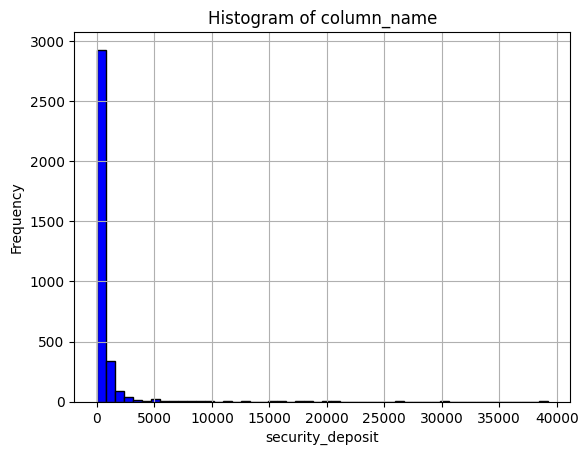

In [9]:
# Histogram of a column to check for skewness

df_listing_info['security_deposit'].hist(bins=50, color='blue', edgecolor='black')
plt.title('Histogram of column_name')
plt.xlabel('security_deposit')
plt.ylabel('Frequency')
plt.show()

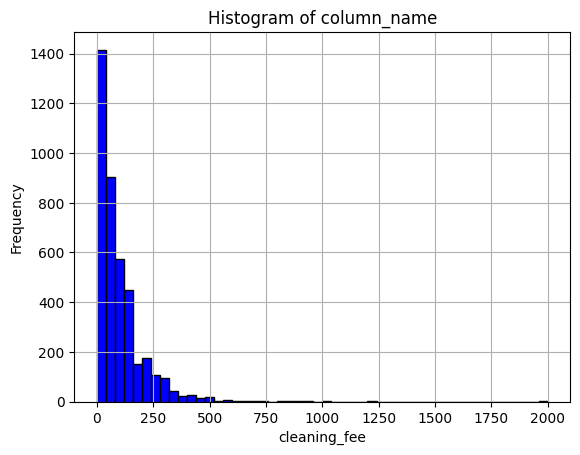

In [10]:
df_listing_info['cleaning_fee'].hist(bins=50, color='blue', edgecolor='black')
plt.title('Histogram of column_name')
plt.xlabel('cleaning_fee')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Highly skewed data. Hence taking median instead of mean

df_listing_info['security_deposit'] = df_listing_info['security_deposit'].fillna(df_listing_info['security_deposit'].median())
df_listing_info['cleaning_fee'] = df_listing_info['cleaning_fee'].fillna(df_listing_info['cleaning_fee'].median())


In [12]:
# List of columns you want to check skewness for
columns_to_check = ['bedrooms', 'beds', 'bathrooms']

# Calculate skewness for the selected columns
skewness_values = df_listing_info[columns_to_check].skew()

# Display skewness values
print(skewness_values)

# Highly skewed data. For an normally distributed data the range cna be from -0.5 to +0.5.
# So it better to take mode for missing values

bedrooms     3.101198
beds         3.002075
bathrooms    5.019227
dtype: float64


In [13]:
df_listing_info['bedrooms'] = df_listing_info['bedrooms'].fillna(df_listing_info['bedrooms'].mode()[0]).astype(int)
df_listing_info['beds'] = df_listing_info['beds'].fillna(df_listing_info['beds'].mode()[0]).astype(int)
df_listing_info['bathrooms'] = df_listing_info['bathrooms'].fillna(df_listing_info['bathrooms'].mode()[0]).astype(int)

In [14]:
df_listing_info.isnull().sum()

listing_id             0
listing_url            0
name                   0
description            0
street                 0
suburb                 0
government_area        0
market                 0
country                0
country_code           0
latitude               0
longitude              0
property_type          0
room_type              0
bed_type               0
minimum_nights         0
maximum_nights         0
cancellation_policy    0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
price                  0
security_deposit       0
cleaning_fee           0
extra_people           0
guests_included        0
picture_url            0
availability_30        0
availability_60        0
availability_90        0
availability_365       0
amenities              0
dtype: int64

In [15]:
df_listing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           5555 non-null   object 
 1   listing_url          5555 non-null   object 
 2   name                 5555 non-null   object 
 3   description          5555 non-null   object 
 4   street               5555 non-null   object 
 5   suburb               5555 non-null   object 
 6   government_area      5555 non-null   object 
 7   market               5555 non-null   object 
 8   country              5555 non-null   object 
 9   country_code         5555 non-null   object 
 10  latitude             5555 non-null   float64
 11  longitude            5555 non-null   float64
 12  property_type        5555 non-null   object 
 13  room_type            5555 non-null   object 
 14  bed_type             5555 non-null   object 
 15  minimum_nights       5555 non-null   o

In [16]:
# Convert to appropriate data types

df_listing_info['minimum_nights'] = df_listing_info['minimum_nights'].astype(int)
df_listing_info['maximum_nights'] = df_listing_info['maximum_nights'].astype(int)
df_listing_info['bedrooms'] = df_listing_info['bedrooms'].astype(int)
df_listing_info['beds'] = df_listing_info['beds'].astype(int)
df_listing_info['bathrooms'] = df_listing_info['bathrooms'].astype(int)
df_listing_info['extra_people'] = df_listing_info['extra_people'].astype(int)
df_listing_info['guests_included'] = df_listing_info['guests_included'].astype(int)

In [17]:
df_listing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           5555 non-null   object 
 1   listing_url          5555 non-null   object 
 2   name                 5555 non-null   object 
 3   description          5555 non-null   object 
 4   street               5555 non-null   object 
 5   suburb               5555 non-null   object 
 6   government_area      5555 non-null   object 
 7   market               5555 non-null   object 
 8   country              5555 non-null   object 
 9   country_code         5555 non-null   object 
 10  latitude             5555 non-null   float64
 11  longitude            5555 non-null   float64
 12  property_type        5555 non-null   object 
 13  room_type            5555 non-null   object 
 14  bed_type             5555 non-null   object 
 15  minimum_nights       5555 non-null   i

In [18]:
df_listing_info.duplicated().sum()
# No duplicate rows as well

np.int64(0)

In [19]:
def host_info():
    host = []
    
    for i in airbnb_data:
        # Convert host_verifications list to a comma-separated string
        host_verifications = ', '.join(i['host']['host_verifications'])
        
        data = dict(
            listing_id=i['_id'],
            host_id=i['host']['host_id'],
            host_url=i['host']['host_url'],
            host_name=i['host']['host_name'],
            host_location=i['host']['host_location'],
            host_about=i['host']['host_about'],
            host_response_time = i['host'].get('host_response_time'),
            host_response_rate=i['host'].get('host_response_rate'),
            host_picture_url=i['host']['host_picture_url'],
            host_is_superhost=i['host']['host_is_superhost'],
            host_has_profile_pic = i['host']['host_has_profile_pic'],
            host_identity_verified = i['host']['host_identity_verified'],
            host_total_listings=i['host']['host_total_listings_count'],
            host_verifications=host_verifications
        )
        host.append(data)
        
    return host


In [20]:
df_host_info = pd.DataFrame(host_info()) 

In [21]:
df_host_info.isnull().sum()

listing_id                   0
host_id                      0
host_url                     0
host_name                    0
host_location                0
host_about                   0
host_response_time        1388
host_response_rate        1388
host_picture_url             0
host_is_superhost            0
host_has_profile_pic         0
host_identity_verified       0
host_total_listings          0
host_verifications           0
dtype: int64

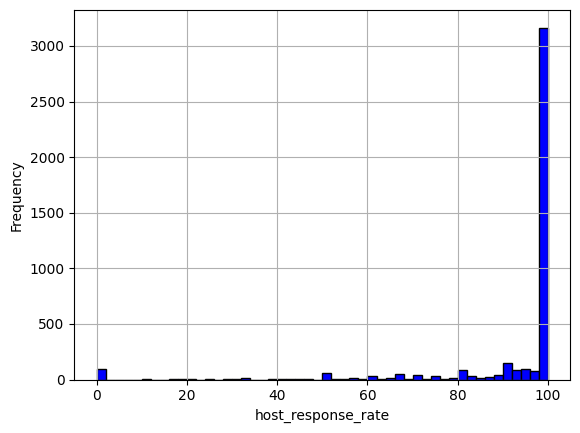

In [22]:
df_host_info['host_response_rate'].hist(bins=50, color='blue', edgecolor='black')
plt.xlabel('host_response_rate')
plt.ylabel('Frequency')
plt.show()

In [23]:
df_host_info['host_response_rate'] = df_host_info['host_response_rate'].fillna(df_host_info['host_response_rate'].median())

In [24]:
df_host_info['host_response_time'] = df_host_info['host_response_time'].fillna(df_host_info['host_response_time'].mode()[0])

In [25]:
df_host_info.isnull().sum()

listing_id                0
host_id                   0
host_url                  0
host_name                 0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_picture_url          0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
host_total_listings       0
host_verifications        0
dtype: int64

In [26]:
df_host_info.duplicated().sum()

np.int64(0)

In [27]:
df_host_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              5555 non-null   object 
 1   host_id                 5555 non-null   object 
 2   host_url                5555 non-null   object 
 3   host_name               5555 non-null   object 
 4   host_location           5555 non-null   object 
 5   host_about              5555 non-null   object 
 6   host_response_time      5555 non-null   object 
 7   host_response_rate      5555 non-null   float64
 8   host_picture_url        5555 non-null   object 
 9   host_is_superhost       5555 non-null   bool   
 10  host_has_profile_pic    5555 non-null   bool   
 11  host_identity_verified  5555 non-null   bool   
 12  host_total_listings     5555 non-null   int64  
 13  host_verifications      5555 non-null   object 
dtypes: bool(3), float64(1), int64(1), object

In [28]:
df_host_info.head(2)

,listing_id,host_id,host_url,host_name,host_location,host_about,host_response_time,host_response_rate,host_picture_url,host_is_superhost,host_has_profile_pic,host_identity_verified,host_total_listings,host_verifications
0,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",By now I have lived longer in the city than th...,within an hour,100.0,https://a0.muscache.com/im/pictures/f1022be4-e...,True,True,True,3,"email, phone, reviews, jumio, offline_governme..."
1,10133554,52004703,https://www.airbnb.com/users/show/52004703,Mehmet Emin,"Istanbul, İstanbul, Turkey",,within a few hours,100.0,https://a0.muscache.com/im/pictures/user/4cb6b...,False,True,True,2,"email, phone, facebook, reviews, jumio, offlin..."


In [29]:
def review_info():

    review_data=[]

    for i in airbnb_data:
        data=dict(
            listing_id=i['_id'],
            first_review=i.get('first_review'),
            last_review=i.get('last_review'),
            number_of_reviews=i['number_of_reviews'],
            accuracy_score=i['review_scores'].get('review_scores_accuracy'),
            cleanliness_score=i['review_scores'].get('review_scores_cleanliness'),
            checkin_score=i['review_scores'].get('review_scores_checkin'),
            communication_score=i['review_scores'].get('review_scores_communication'),
            location_score=i['review_scores'].get('review_scores_communication'),
            value_score=i['review_scores'].get('review_scores_value'),
            rating=i['review_scores'].get('review_scores_rating')
        )
        review_data.append(data)

    
    return review_data

In [30]:
df_review_info = pd.DataFrame(review_info())

In [31]:
df_review_info.isnull().sum()

listing_id                0
first_review           1388
last_review            1388
number_of_reviews         0
accuracy_score         1476
cleanliness_score      1473
checkin_score          1475
communication_score    1474
location_score         1474
value_score            1475
rating                 1474
dtype: int64

In [32]:
# List of columns you want to check skewness for
columns_to_check = ['accuracy_score', 'cleanliness_score', 'checkin_score', 
                    'communication_score', 'location_score', 'value_score', 
                    'rating']

# Calculate skewness for the selected columns
skewness_values = df_review_info[columns_to_check].skew()

# Display skewness values
print(skewness_values)

accuracy_score        -3.994755
cleanliness_score     -2.990649
checkin_score         -4.754374
communication_score   -4.990911
location_score        -4.990911
value_score           -2.975530
rating                -3.526784
dtype: float64


In [33]:
df_review_info['first_review'] = df_review_info['first_review'].fillna(df_review_info['first_review'].mode()[0])
df_review_info['last_review'] = df_review_info['last_review'].fillna(df_review_info['last_review'].mode()[0])
df_review_info['accuracy_score'] = df_review_info['accuracy_score'].fillna(df_review_info['accuracy_score'].median())
df_review_info['cleanliness_score'] = df_review_info['cleanliness_score'].fillna(df_review_info['cleanliness_score'].median())
df_review_info['checkin_score'] = df_review_info['checkin_score'].fillna(df_review_info['checkin_score'].median())
df_review_info['communication_score'] = df_review_info['communication_score'].fillna(df_review_info['communication_score'].median())
df_review_info['location_score'] = df_review_info['location_score'].fillna(df_review_info['location_score'].median())
df_review_info['value_score'] = df_review_info['value_score'].fillna(df_review_info['value_score'].median())
df_review_info['rating'] = df_review_info['rating'].fillna(df_review_info['rating'].median())

In [34]:
df_review_info.isnull().sum()

listing_id             0
first_review           0
last_review            0
number_of_reviews      0
accuracy_score         0
cleanliness_score      0
checkin_score          0
communication_score    0
location_score         0
value_score            0
rating                 0
dtype: int64

In [35]:
df_review_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           5555 non-null   object 
 1   first_review         5555 non-null   object 
 2   last_review          5555 non-null   object 
 3   number_of_reviews    5555 non-null   int64  
 4   accuracy_score       5555 non-null   float64
 5   cleanliness_score    5555 non-null   float64
 6   checkin_score        5555 non-null   float64
 7   communication_score  5555 non-null   float64
 8   location_score       5555 non-null   float64
 9   value_score          5555 non-null   float64
 10  rating               5555 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 477.5+ KB


In [36]:
df_review_info['first_review'] = pd.to_datetime(df_review_info['first_review'], errors='coerce')
df_review_info['last_review'] = pd.to_datetime(df_review_info['last_review'], errors='coerce')
df_review_info['accuracy_score'] = df_review_info['accuracy_score'].astype(int)
df_review_info['cleanliness_score'] = df_review_info['cleanliness_score'].astype(int)
df_review_info['checkin_score'] = df_review_info['checkin_score'].astype(int)
df_review_info['communication_score'] = df_review_info['communication_score'].astype(int)
df_review_info['location_score'] = df_review_info['location_score'].astype(int)
df_review_info['value_score'] = df_review_info['value_score'].astype(int)
df_review_info['rating'] = df_review_info['rating'].astype(int)

In [37]:
df_review_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   listing_id           5555 non-null   object        
 1   first_review         5555 non-null   datetime64[ns]
 2   last_review          5555 non-null   datetime64[ns]
 3   number_of_reviews    5555 non-null   int64         
 4   accuracy_score       5555 non-null   int64         
 5   cleanliness_score    5555 non-null   int64         
 6   checkin_score        5555 non-null   int64         
 7   communication_score  5555 non-null   int64         
 8   location_score       5555 non-null   int64         
 9   value_score          5555 non-null   int64         
 10  rating               5555 non-null   int64         
dtypes: datetime64[ns](2), int64(8), object(1)
memory usage: 477.5+ KB


In [38]:
df_review_info.head(2)

,listing_id,first_review,last_review,number_of_reviews,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,rating
0,1003530,2013-04-29 04:00:00,2018-08-12 04:00:00,70,10,9,10,10,10,10,94
1,10133554,2017-05-04 04:00:00,2018-05-07 04:00:00,29,9,9,10,10,10,9,92


In [39]:
def review_comments_info():

    comments_data=[]

    for j in airbnb_data:
        r_list=j.get('reviews',[])
        for i in r_list:
            data=dict(
                listing_id=i.get('listing_id'),
                comment_id=i.get('_id'),
                date=i.get('date'),                
                reviewer_name=i.get('reviewer_name'),
                comments=i.get('comments')
                )
            comments_data.append(data)
    
    return comments_data

In [40]:
df_comments_info = pd.DataFrame(review_comments_info())

In [41]:
df_comments_info.isnull().sum()

listing_id       0
comment_id       0
date             0
reviewer_name    1
comments         8
dtype: int64

In [42]:
df_comments_info = df_comments_info.fillna('Not Available')

In [43]:
df_comments_info.isnull().sum()

listing_id       0
comment_id       0
date             0
reviewer_name    0
comments         0
dtype: int64

In [44]:
df_comments_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149792 entries, 0 to 149791
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     149792 non-null  object
 1   comment_id     149792 non-null  object
 2   date           149792 non-null  object
 3   reviewer_name  149792 non-null  object
 4   comments       149792 non-null  object
dtypes: object(5)
memory usage: 5.7+ MB


In [45]:
df_comments_info['date'] = pd.to_datetime(df_comments_info['date'])

In [46]:
df_comments_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149792 entries, 0 to 149791
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     149792 non-null  object        
 1   comment_id     149792 non-null  object        
 2   date           149792 non-null  datetime64[ns]
 3   reviewer_name  149792 non-null  object        
 4   comments       149792 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.7+ MB


In [47]:
df_comments_info.head(3)

,listing_id,comment_id,date,reviewer_name,comments
0,1003530,4351675,2013-04-29 04:00:00,Josh,i had a really pleasant stay at greta's place....
1,1003530,4848277,2013-05-28 04:00:00,Ralf,"Greta has been a great host, and her apartment..."
2,1003530,5094175,2013-06-11 04:00:00,Mame,Greta was wonderful. We arrived late at night ...


In [48]:
# =========================================================================================

In [49]:
# df_listing_info, df_host_info, df_review_info, df_comments_info

In [50]:
# # Converting DataFrames to Excel
# import openpyxl
# with pd.ExcelWriter('Extracted_tables.xlsx') as writer:
#     df_listing_info.to_excel(writer, sheet_name='df_listing_info')
#     df_host_info.to_excel(writer, sheet_name='df_host_info')
#     df_review_info.to_excel(writer, sheet_name='df_review_info')
#     df_comments_info.to_excel(writer, sheet_name='df_comments_info')
    

In [51]:
# # Converting to CSVs
# df_listing_info.to_csv('df_listing_info.csv',index=False)
# df_host_info.to_csv('df_host_info.csv',index=False)
# df_review_info.to_csv('df_review_info.csv',index=False)
# df_comments_info.to_csv('df_comments_info.csv',index=False)


In [52]:
import mysql.connector
from sqlalchemy import create_engine
import pandas as pd  

# MySQL Credentials
u_name = 'root'
u_pass = '1000Shaik#1'
host_name = 'localhost'
port = 3306
database_name = 'AIRBNB_PROJECT_LATEST'

# Helper function to create and return a MySQL connection
def create_mysql_connection(database=None):
    try:
        if database:
            connection = mysql.connector.connect(
                host=host_name, user=u_name, passwd=u_pass, db=database)
        else:
            connection = mysql.connector.connect(
                host=host_name, user=u_name, passwd=u_pass)
        return connection
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return None

# Create database if it doesn't exist
connection = create_mysql_connection()
if connection:
    try:
        mycursor = connection.cursor()
        mycursor.execute(f"CREATE DATABASE IF NOT EXISTS {database_name}")
        print(f"Database '{database_name}' created or already exists.")
    finally:
        mycursor.close()
        connection.close()

# Now connect to the specific database
connection = create_mysql_connection(database=database_name)

if connection:
    # Create a SQLAlchemy engine for data transfer
    engine = create_engine(f"mysql+mysqlconnector://{u_name}:{u_pass}@{host_name}/{database_name}")

    # Push DataFrames to MySQL tables
    try:
        dataframes = [
            (df_listing_info, 'listing_info'),
            (df_host_info, 'host_info'),
            (df_review_info, 'review_info'),
            (df_comments_info, 'comments_info')           
            ]

        for df, table_name in dataframes:
            # Insert DataFrame into the table (replace if it already exists)
            print(f"Inserting {table_name} into MySQL database...")
            df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)
            print(f"Data inserted into {table_name}.")

    except Exception as e:
        print(f"Error during data insertion: {e}")
    finally:
        connection.close()
else:
    print("Failed to connect to the MySQL database.")


Database 'AIRBNB_PROJECT_LATEST' created or already exists.
Inserting listing_info into MySQL database...
Data inserted into listing_info.
Inserting host_info into MySQL database...
Data inserted into host_info.
Inserting review_info into MySQL database...
Data inserted into review_info.
Inserting comments_info into MySQL database...
Data inserted into comments_info.
